In [3]:
import pandas as pd
import json
from tqdm.auto import tqdm
from IPython.display import clear_output
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('change_org_petitions_Amber_Heard__at_20220814-111132_limit_2000_offset_0_delay_ms_5000.csv')

results = json.load(open('classification.json', 'r')) # or {}

In [5]:
def ask(options):
    ok = False
    while not ok:
        inp = input('decision')
        if inp in options:
            print(inp)
            return inp

In [6]:
len(set(df['petition.slug']) - set(results.keys()))

246

In [7]:
for i, r in tqdm(df.iterrows(), total=len(df)):
    print(i, "/", len(df))
    slug = r['petition.slug']
    if slug in results:
        continue
    print("TO", r['_source.targeting_description'])
    print("ASK", r['_source.ask'])
    print("DESCR", r['petition.description'])
    a = ask(['for', 'against', 'related', 'irrelevant'])
    results[slug] = a
    clear_output()

587 / 588


In [8]:
import json
json.dump(results, open('classification.json', 'w'))

In [9]:
pickle.dump

NameError: name 'pickle' is not defined

In [10]:
df_out = pd.DataFrame(results.items(), columns=['slug', 'status'])
df_out.to_csv('./data/all_petitions_status_manual.csv', index=False)
df_out

,slug,status
0,dc-entertainment-remove-amber-heard-from-aquam...,against
1,l-oréal-remove-amber-heard-as-l-oreal-spokespe...,against
2,hollywood-boycott-aquaman-2-amber-heard,against
3,united-states-supreme-court-put-amber-heard-be...,against
4,people-with-common-sense-amber-heard-must-be-f...,against
...,...,...
584,support-for-false-accusations-of-domestic-viol...,for
585,make-the-roads-safer-ban-women-from-getting-a-...,against
586,bring-back-johnny-depp-as-captain-jack-sparrow...,against
587,unban-scorpione-on-dgg,related


In [11]:
sss = [slug for slug, status in results.items() if status == 'irrelevant']

In [12]:
results['warner-brothers-leave-ezra-miller-as-the-flash-and-in-fantastic-beasts-3'] = 'related'
results['warner-brothers-for-johnny-depp-to-keep-his-job-as-grindelwald'] = 'against'
results['at-t-boycott-warner-media-and-their-parent-company-at-t'] = 'against'

In [13]:
df[df['petition__slug'] == sss[107]].petition__description.iloc[0]
sss[107]

KeyError: 'petition__slug'

In [14]:
for s in tqdm(sss):
    print(s)
    print(str(df[df['petition__slug'] == s].petition__description.iloc[0]))
    input()
    clear_output()

  0%|          | 0/138 [00:00<?, ?it/s]

australia-needs-an-animal-abuse-registry-for-offenders


KeyError: 'petition__slug'

In [15]:
# before
sss.index('tim-butler-tow-operators-lives-matter')

105

In [17]:
from matplotlib import pyplot as plt
from collections import Counter

In [18]:
df_out_filter = df_out[df_out['status'] != 'irrelevant']

In [19]:
statuses, counts = list(zip(*Counter(df_out_filter.status).most_common()))

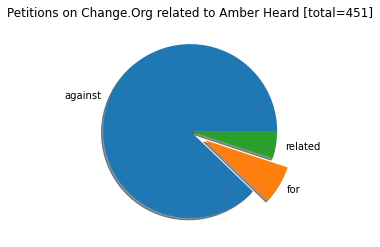

In [20]:
plt.title("Petitions on Change.Org related to Amber Heard [total=%d]" % len(df_out_filter))
plt.pie(counts, labels=statuses, explode=[0, 0.2, 0], shadow=True)
plt.savefig('./figures/amber_heard_change_org_pie_chart.png', bbox_inches='tight')
plt.show()